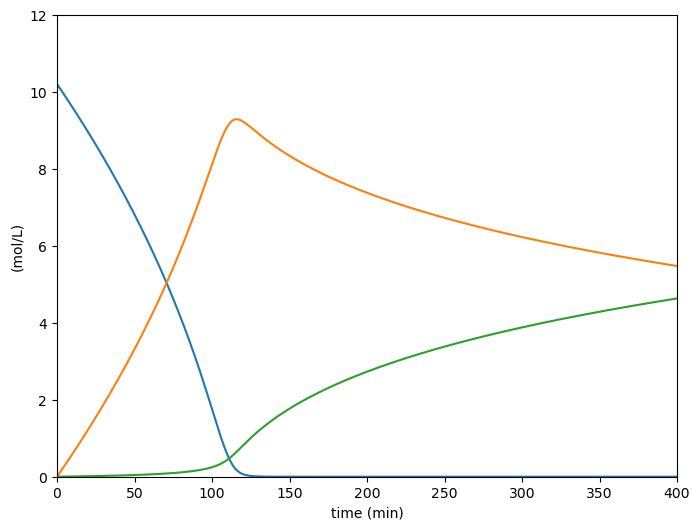

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def heter_STR(C_A0 = 10.2, C_B0 = 0, C_C0 = 0, cat_load = 0.2):

    C_A0 = C_A0  # mol/L
    C_B0 = C_B0  # mol/L
    C_C0 = C_C0  # mol/L
    C_D0 = 0     # mol/L
    C_H0 = 19.2  # mol/L

    mtot = 200 # g of A in a semibatch reactor

    # Molecular weights
    MW = [84.118, 86.132, 88.148, 160, 1.008]  # g/mol

    dens = 0.86 # g.mL-1 average denstiy of A
    # Note:  Assumes similar densities of all the compounds    
    # Reaction volume
    VL = mtot/MW[0]/C_A0 # in L

    To = 348 # K - initial temperature (75ºC)

    # Catalyst
    CatalystMass = 0.3829 # in [g]
    CatAvalaible = cat_load/100 # percent 

    CatMW = 106.42 # molar mass of the catalyst

    nCat = (CatalystMass*CatAvalaible)/CatMW

#          components A  B  D  E  F     
    alfa = np.array([ 
                    [-1, 1, 0, 0, -1], # R1
                    [0, -1, 1, 0, -1], # R2
                    [-1, 0, 1, 0, -2], # R3
                    [-2, 0, 0, 1, -2], # R4
                                    ], dtype=float)

    Nreactions, Ncomponents = alfa.shape


    def ode(t, y):

        C = y

        kp1 = 99627.28  # L.mol/Cat.s
        kp2 = 1884.84  # L.mol/Cat.s
        kp3 = 915.49  # L.mol/Cat.s
        kp4 = 479.29  # L.mol/Cat.s
        K_A = 17.50  # L/mol
        K_B = 1.97   # L/mol
        K_H = 0.04  # non-dimensional
        Kest = 9.13  # L/mol

        #(1xR) mol.mol/Cat.s
        ri = np.ones(Nreactions)
        ri[0] = kp1*C[0] / (1+K_A*C[0]+np.sqrt(K_H)+K_B*C[1]+Kest*(C[2]+C[3]))**2   
        ri[1] = kp2*C[1] / (1+K_A*C[0]+np.sqrt(K_H)+K_B*C[1]+Kest*(C[2]+C[3]))**2
        ri[2] = kp3*C[0] / (1+K_A*C[0]+np.sqrt(K_H)+K_B*C[1]+Kest*(C[2]+C[3]))**2
        ri[3] = kp4*C[0] / (1+K_A*C[0]+np.sqrt(K_H)+K_B*C[1]+Kest*(C[2]+C[3]))**2
        
        # Differential Eqs
        dC = ri.dot(alfa)*(nCat/VL)

        return dC


    Ci0 =  [C_A0, C_B0, C_C0, C_D0, C_H0]  # mol/L
    t  = np.linspace(0, 400.*60, 100000)   # time grid

    # solving the DEs
    sol = solve_ivp(ode, [t[0], t[-1]], Ci0, t_eval = t)

    C_A0 = sol.y[0] # mol/L
    C_B0 = sol.y[1] # mol/L
    C_C0 = sol.y[2] # mol/L
    C_D0   = sol.y[3] # mol/L
    C_H20  = sol.y[4] # mol/L

    t = t/60 # conversion to min

    # Plotting the results
    fig, ax = plt.subplots(figsize=(8,6))

    ax.plot(t, C_A0, t, C_B0, t, C_C0)
    ax.set_xlabel('time (min)')
    ax.set_ylabel('(mol/L)')
    ax.set_xlim([0,400])
    ax.set_ylim([0,12])
    plt.show()

# you can change the catalyst load and see its effect on concentrations
heter_STR(C_A0 = 10.2, C_B0 = 0, C_C0 = 0, cat_load = 0.2)